In [1]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

class_names = ['A', 'B', 
               'C', 'D', 'E', 'F', 
               'G', 'H', 'K', 'L', 
               'M', 'N', 'P', 
               'R', 'S', 'T', 'U', 
               'V', 'X', 'Y', 'Z']

def rgb_to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

datagen = ImageDataGenerator(
    preprocessing_function=rgb_to_grayscale,
    rescale=1.0/255, 
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_generator = datagen.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=1024,
    subset='training',
    class_mode='sparse'
)

validation_generator = datagen.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=1024,
    subset='validation',
    class_mode='sparse'
)

# fig, axs = plt.subplots(3,3)
# plt.rcParams["figure.figsize"] = (10,8)

# for i in range(3):
#     for j in range(3):
#         axs[i, j].imshow(validation_generator[0][0][i + j])
#         axs[i, j].set_title(class_names[int(validation_generator[0][1][i + j])])

Found 12557 images belonging to 21 classes.
Found 3128 images belonging to 21 classes.


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28,12,3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu', 
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(512, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 12, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 12, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 12, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 12, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 6, 128)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 6, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 6, 256)        2

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') > 0.999 and logs.get('accuracy') > 0.99) :
            print('\nReached 99% accuracy so stopping training')
            self.model.stop_training = True

In [6]:
callback = stopCallback()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel\\version3.hdf5',
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True)

history = model.fit(train_generator, 
                    epochs=1000, 
                    callbacks=[model_checkpoint_callback], 
                    validation_data=validation_generator)

Epoch 1/1000
13/13 [==============================] - 26s 2s/step - loss: 2.5741 - accuracy: 0.4468 - val_loss: 2.2366 - val_accuracy: 0.6240
Epoch 2/1000
13/13 [==============================] - 21s 2s/step - loss: 1.0352 - accuracy: 0.7747 - val_loss: 1.5661 - val_accuracy: 0.7091
Epoch 3/1000
13/13 [==============================] - 21s 2s/step - loss: 0.7803 - accuracy: 0.8428 - val_loss: 1.8601 - val_accuracy: 0.5316
Epoch 4/1000
13/13 [==============================] - 20s 2s/step - loss: 0.6468 - accuracy: 0.8825 - val_loss: 2.6428 - val_accuracy: 0.3072
Epoch 5/1000
13/13 [==============================] - 20s 2s/step - loss: 0.5630 - accuracy: 0.9061 - val_loss: 2.8544 - val_accuracy: 0.2586
Epoch 6/1000
13/13 [==============================] - 20s 2s/step - loss: 0.5255 - accuracy: 0.9134 - val_loss: 3.3754 - val_accuracy: 0.2231
Epoch 7/1000
13/13 [==============================] - 20s 2s/step - loss: 0.4944 - accuracy: 0.9231 - val_loss: 3.2523 - val_accuracy: 0.2407
Epoch 

(0.0, 3.0)

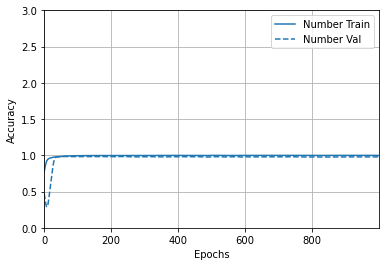

In [10]:
H = {}
H['number'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='accuracy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 3)